# Subspace Digital Twin, Standard Stochastic Run

*Danilo Lessa Bernardineli, November 2023*

## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import hvplot.pandas
import holoviews as hv
hvplot.extension('plotly')

import plotly.io as pio
pio.renderers.default = "png" # For GitHub rendering

import numpy as np

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

## Part 2. Load Simulation Data

In [2]:
# from subspace_model.experiment import standard_stochastic_run
# sim_df = standard_stochastic_run()

# Load simulation results from terminal ran experiment
sim_df = pd.read_pickle(
    "../data/simulations/standard_stochastic_run-2024-01-02_12-04-38.pkl.gz"
)

In [3]:
sim_df.head()

,days_passed,blocks_passed,circulating_supply,user_supply,issued_supply,total_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,operators_balance,nominators_balance,holders_balance,farmers_balance,staking_pool_balance,fund_balance,burnt_balance,nominator_pool_shares,operator_pool_shares,block_reward,history_size,space_pledged,allocated_tokens,buffer_size,reference_subsidy,average_base_fee,average_priority_fee,average_compute_weight_per_tx,average_transaction_size,transaction_count,average_compute_weight_per_bundle,average_bundle_size,bundle_count,compute_fee_volume,storage_fee_volume,rewards_to_nominators,simulation,subset,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label,timestep_in_days,block_time_in_seconds,max_credit_supply
0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,1.320000e+09,1.680000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,NaN,0,0,0.0,0.0,0.00000,0.0,0.0,0.0,256,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0,0,1,0,NaN,NaN,NaN,standard,stochastic,1,6,3000000000
14,1,14400.0,13.698630,13.698630,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,1.680000e+09,0.000000,0.000000,0.129940,13.568691,0.000000,0.000000,0.0,0.000000,0.0,13.698630,0,1060164256000,0.0,97594026.0,13.69863,1.0,1.0,63137161.0,278,14367.0,0.0,0.0,86355.0,0.000000e+00,0.000000,0.0,0,0,1,1,1.0,14400.0,3.449501e+09,standard,stochastic,1,6,3000000000
28,2,28800.0,27.390763,27.390763,1.680000e+09,1.680000e+09,3.000000e+09,0.000001,0.0,1.320000e+09,1.680000e+09,0.000000,0.001650,0.624910,26.764203,0.000000,0.006497,0.0,0.000000,0.0,13.698630,268435456,1060164256000,0.0,60007822.0,13.69863,1.0,0.0,74149876.0,214,14166.0,0.0,0.0,86944.0,1.050407e-06,0.064970,0.0,0,0,1,2,1.0,14400.0,1.070480e+10,standard,stochastic,1,6,3000000000
42,3,43200.0,41.123104,41.123118,1.680000e+09,1.680000e+09,3.000000e+09,0.000003,0.0,1.320000e+09,1.680000e+09,0.000131,0.001636,0.337432,40.783904,0.000014,0.037742,0.0,0.000014,0.0,13.763600,536870912,2043254256000,0.0,25569111.0,13.69863,1.0,7.0,71053534.0,421,14677.0,0.0,0.0,86029.0,8.342822e-06,0.312455,0.0,0,0,1,3,1.0,14400.0,5.920731e+09,standard,stochastic,1,6,3000000000
56,4,57600.0,55.117317,55.117331,1.680000e+09,1.680000e+09,3.000000e+09,0.000003,0.0,1.320000e+09,1.680000e+09,0.002939,0.004106,5.095787,50.014485,0.000014,0.054614,0.0,0.000014,0.0,14.011085,536870912,3965391824000,0.0,124629591.0,13.69863,1.0,0.0,32436779.0,384,14220.0,0.0,0.0,86130.0,4.612510e-07,0.168716,0.0,0,0,1,4,1.0,14400.0,6.381391e+09,standard,stochastic,1,6,3000000000


In [4]:
sim_df.groupby(['run', 'label', 'environmental_label']).size().reset_index(name='Days')

,run,label,environmental_label,Days
0,1,standard,stochastic,1097
1,2,standard,stochastic,1097
2,3,standard,stochastic,1097
3,4,standard,stochastic,1097
4,5,standard,stochastic,1097


## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

In [5]:
runs = [run for _, run in sim_df.groupby('run')]

In [6]:
runs[0].head()

,days_passed,blocks_passed,circulating_supply,user_supply,issued_supply,total_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,operators_balance,nominators_balance,holders_balance,farmers_balance,staking_pool_balance,fund_balance,burnt_balance,nominator_pool_shares,operator_pool_shares,block_reward,history_size,space_pledged,allocated_tokens,buffer_size,reference_subsidy,average_base_fee,average_priority_fee,average_compute_weight_per_tx,average_transaction_size,transaction_count,average_compute_weight_per_bundle,average_bundle_size,bundle_count,compute_fee_volume,storage_fee_volume,rewards_to_nominators,simulation,subset,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label,timestep_in_days,block_time_in_seconds,max_credit_supply
0,0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,1.320000e+09,1.680000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,NaN,0,0,0.0,0.0,0.00000,0.0,0.0,0.0,256,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0,0,1,0,NaN,NaN,NaN,standard,stochastic,1,6,3000000000
14,1,14400.0,13.698630,13.698630,1.680000e+09,1.680000e+09,3.000000e+09,0.000002,0.0,1.320000e+09,1.680000e+09,0.000000,0.000000,0.129940,13.568691,0.000000,0.000000,0.0,0.000000,0.0,13.698630,0,1060164256000,0.0,97594026.0,13.69863,1.0,1.0,63137161.0,278,14367.0,0.0,0.0,86355.0,0.000000e+00,0.000000,0.0,0,0,1,1,1.0,14400.0,3.449501e+09,standard,stochastic,1,6,3000000000
28,2,28800.0,27.390763,27.390763,1.680000e+09,1.680000e+09,3.000000e+09,0.000001,0.0,1.320000e+09,1.680000e+09,0.000000,0.001650,0.624910,26.764203,0.000000,0.006497,0.0,0.000000,0.0,13.698630,268435456,1060164256000,0.0,60007822.0,13.69863,1.0,0.0,74149876.0,214,14166.0,0.0,0.0,86944.0,1.050407e-06,0.064970,0.0,0,0,1,2,1.0,14400.0,1.070480e+10,standard,stochastic,1,6,3000000000
42,3,43200.0,41.123104,41.123118,1.680000e+09,1.680000e+09,3.000000e+09,0.000003,0.0,1.320000e+09,1.680000e+09,0.000131,0.001636,0.337432,40.783904,0.000014,0.037742,0.0,0.000014,0.0,13.763600,536870912,2043254256000,0.0,25569111.0,13.69863,1.0,7.0,71053534.0,421,14677.0,0.0,0.0,86029.0,8.342822e-06,0.312455,0.0,0,0,1,3,1.0,14400.0,5.920731e+09,standard,stochastic,1,6,3000000000
56,4,57600.0,55.117317,55.117331,1.680000e+09,1.680000e+09,3.000000e+09,0.000003,0.0,1.320000e+09,1.680000e+09,0.002939,0.004106,5.095787,50.014485,0.000014,0.054614,0.0,0.000014,0.0,14.011085,536870912,3965391824000,0.0,124629591.0,13.69863,1.0,0.0,32436779.0,384,14220.0,0.0,0.0,86130.0,4.612510e-07,0.168716,0.0,0,0,1,4,1.0,14400.0,6.381391e+09,standard,stochastic,1,6,3000000000


In [7]:
runs[1].head()

,days_passed,blocks_passed,circulating_supply,user_supply,issued_supply,total_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,operators_balance,nominators_balance,holders_balance,farmers_balance,staking_pool_balance,fund_balance,burnt_balance,nominator_pool_shares,operator_pool_shares,block_reward,history_size,space_pledged,allocated_tokens,buffer_size,reference_subsidy,average_base_fee,average_priority_fee,average_compute_weight_per_tx,average_transaction_size,transaction_count,average_compute_weight_per_bundle,average_bundle_size,bundle_count,compute_fee_volume,storage_fee_volume,rewards_to_nominators,simulation,subset,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label,timestep_in_days,block_time_in_seconds,max_credit_supply
15345,0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.320000e+09,1.680000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,NaN,0,0,0.0,0.0,0.00000,0.0,0.0,0.0,256,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,0,2,0,NaN,NaN,NaN,standard,stochastic,1,6,3000000000
15359,1,14400.0,13.698630,13.698630,1.680000e+09,1.680000e+09,3.000000e+09,8.817514e-07,0.0,1.320000e+09,1.680000e+09,0.000000,0.000000,1.382721,12.315909,0.000000,0.000000,0.000000e+00,0.0,0.000000,13.698630,0,1936294064000,0.0,95397390.0,13.69863,2.0,0.0,62893401.0,126,14265.0,0.0,0.0,86459.0,0.000000,0.000000,0.0,0,0,2,1,1.0,14400.0,9.119749e+09,standard,stochastic,1,6,3000000000
15373,2,28800.0,27.328124,27.328124,1.680000e+09,1.680000e+09,3.000000e+09,1.574409e-06,0.0,1.320000e+09,1.680000e+09,0.012372,0.006897,0.672085,26.636769,0.000000,0.069136,0.000000e+00,0.0,0.000000,13.698630,268435456,4923314720000,0.0,57988988.0,13.69863,1.0,4.0,76207882.0,227,14138.0,0.0,0.0,86475.0,0.000005,0.691360,0.0,0,0,2,2,1.0,14400.0,6.414856e+09,standard,stochastic,1,6,3000000000
15387,3,43200.0,41.684398,41.684510,1.680000e+09,1.680000e+09,3.000000e+09,1.226954e-06,0.0,1.320000e+09,1.680000e+09,0.011705,0.021652,2.084532,39.566510,0.000112,0.102740,0.000000e+00,0.0,0.000112,14.389990,536870912,6145492208000,0.0,19872321.0,13.69863,1.0,9.0,67713669.0,173,14457.0,0.0,0.0,86455.0,0.000010,0.336043,0.0,0,0,2,3,1.0,14400.0,1.235298e+10,standard,stochastic,1,6,3000000000
15401,4,57600.0,55.614844,55.614956,1.680000e+09,1.680000e+09,3.000000e+09,1.583096e-06,0.0,1.320000e+09,1.680000e+09,0.043502,0.021652,2.596196,52.953494,0.000112,0.206967,1.063082e-07,0.0,0.000112,14.034673,536870912,6381433808000,0.0,116699354.0,13.69863,3.0,0.0,70216574.0,223,14471.0,0.0,0.0,85995.0,0.000003,1.042266,0.0,0,0,2,4,1.0,14400.0,4.069336e+09,standard,stochastic,1,6,3000000000


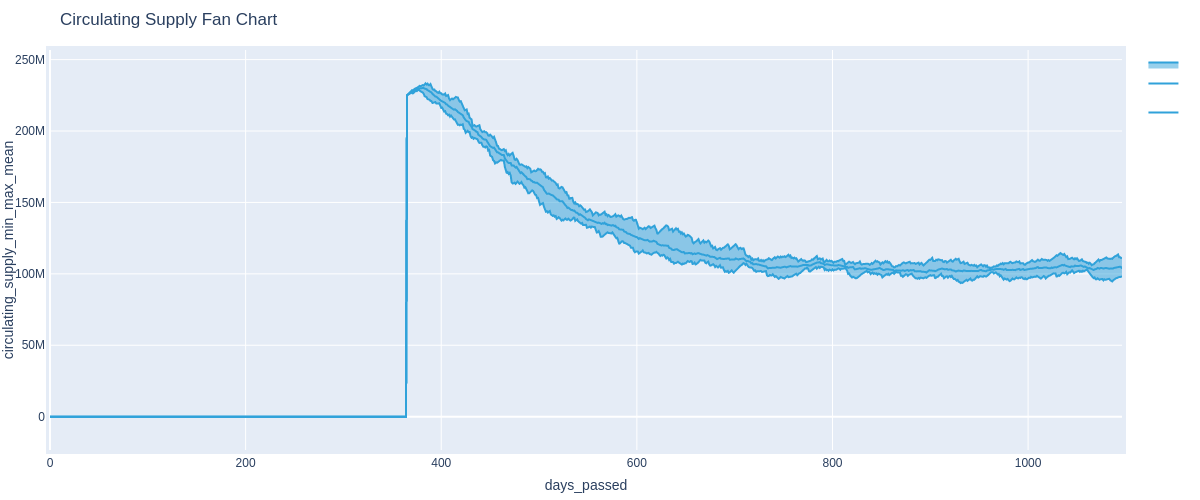

In [22]:
circulating_supply_fan_df = sim_df.groupby('days_passed')['circulating_supply'].agg(['min', 'max', 'mean'])
chart = circulating_supply_fan_df.hvplot.area(x='days_passed', y='min', y2='max', title='Circulating Supply Fan Chart', width=1200, height=500, ylabel='circulating_supply_min_max_mean') * circulating_supply_fan_df.hvplot(x='days_passed', y='mean')
pio.show(hv.render(chart, backend='plotly'))

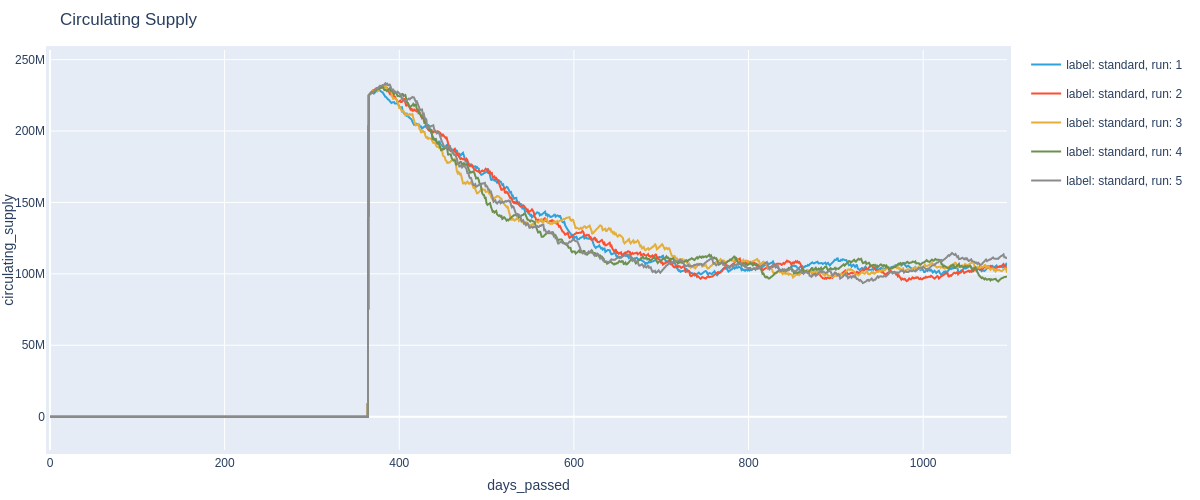

In [9]:
chart = sim_df.hvplot.line(x='days_passed', y='circulating_supply', by=['label', 'run'], title='Circulating Supply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

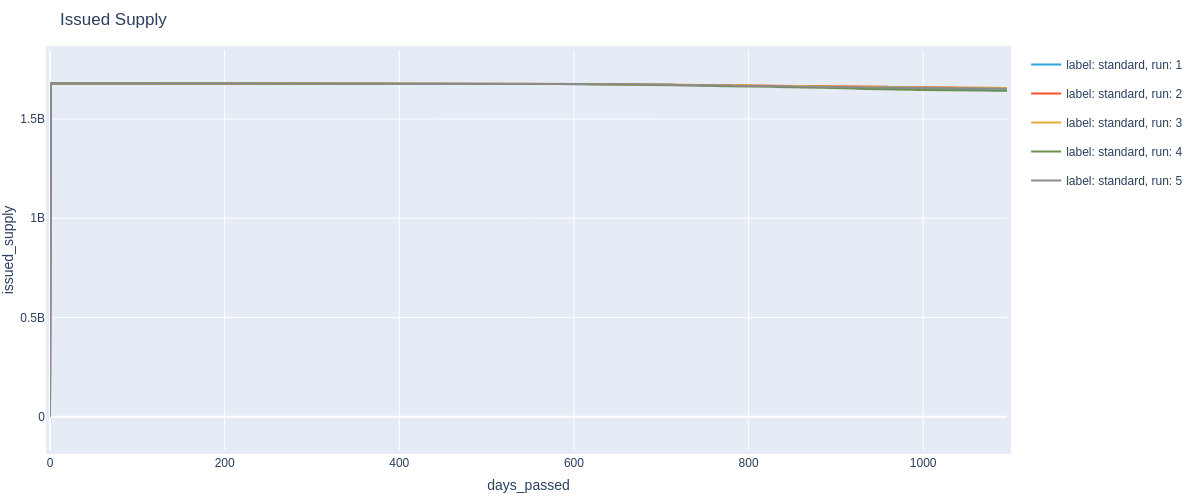

In [10]:
chart = sim_df.hvplot.line(x='days_passed', y='issued_supply', by=['label', 'run'], title='Issued Supply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

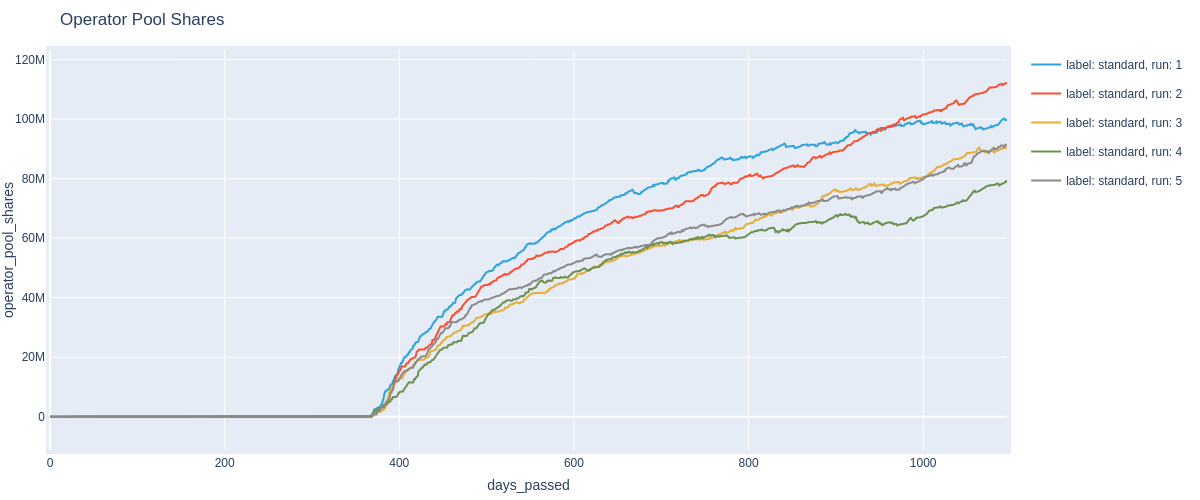

In [11]:
chart = sim_df.hvplot.line(x='days_passed', y='operator_pool_shares', by=['label', 'run'], title='Operator Pool Shares', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

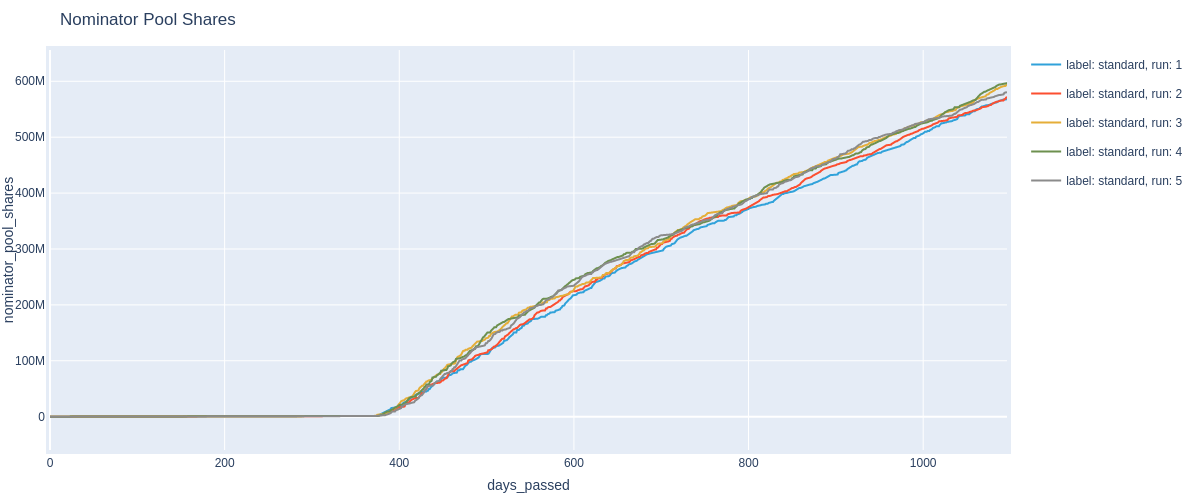

In [12]:
chart = sim_df.hvplot.line(x='days_passed', y='nominator_pool_shares', by=['label', 'run'], title='Nominator Pool Shares', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

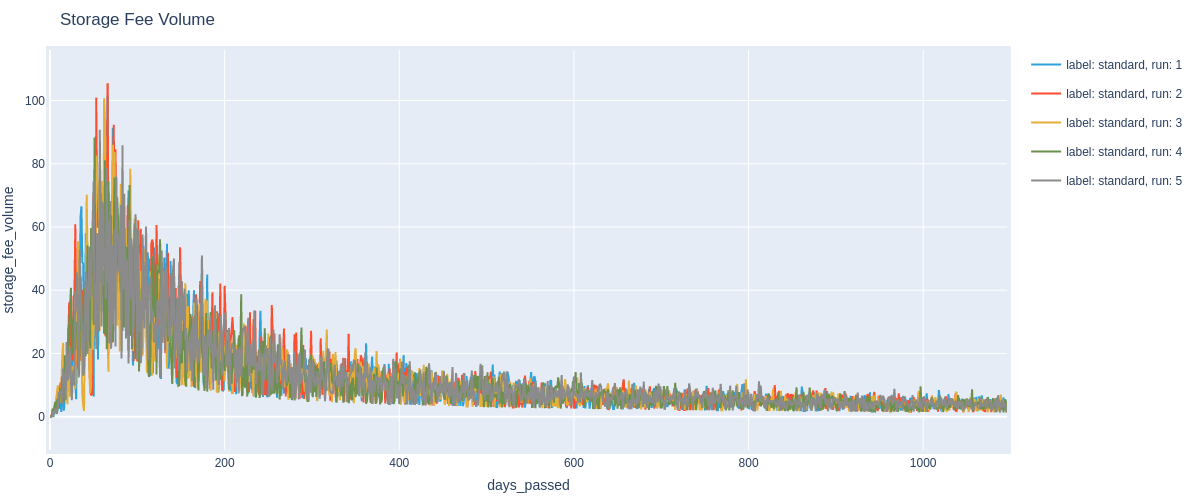

In [13]:
chart = sim_df.hvplot.line(x='days_passed', y='storage_fee_volume', by=['label', 'run'], title='Storage Fee Volume', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

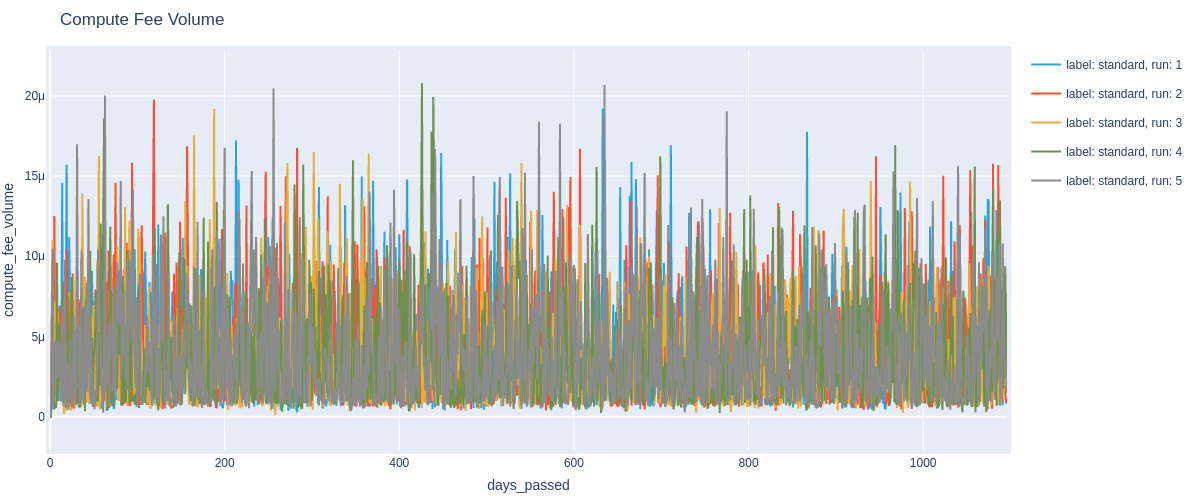

In [14]:
chart = sim_df.hvplot.line(x='days_passed', y='compute_fee_volume', by=['label', 'run'], title='Compute Fee Volume', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

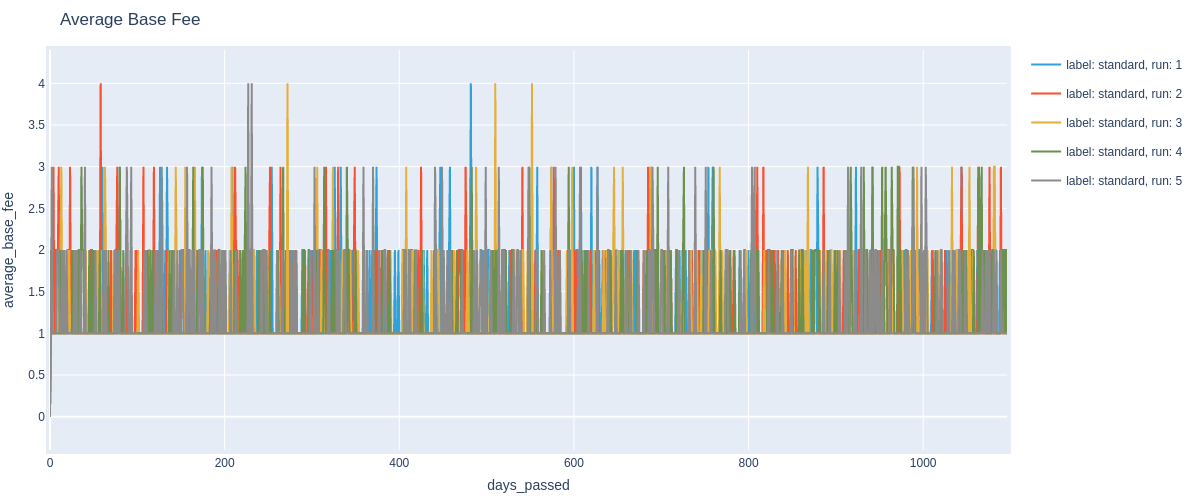

In [15]:
chart = sim_df.hvplot.line(x='days_passed', y='average_base_fee', by=['label', 'run'], title='Average Base Fee', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

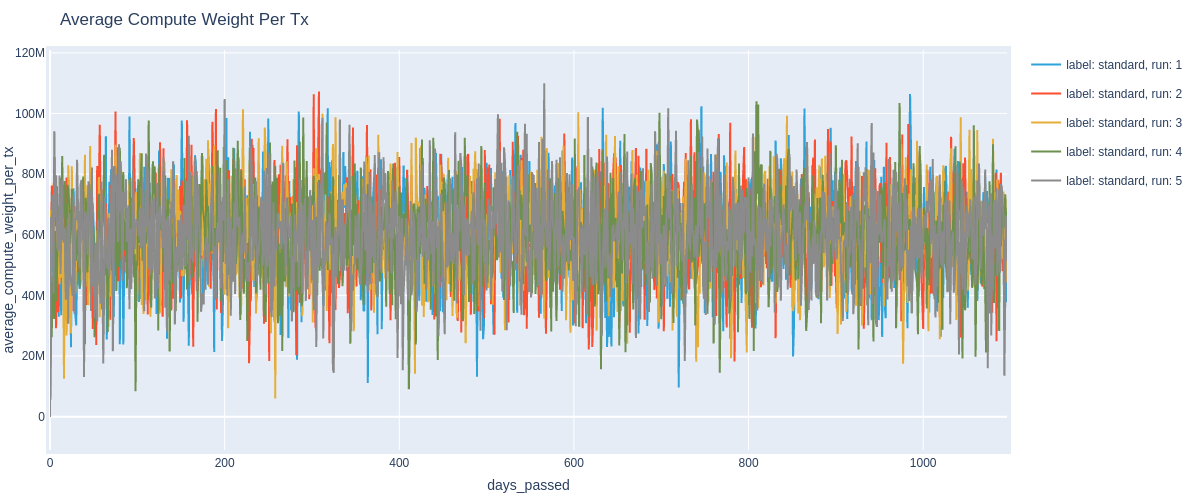

In [16]:
chart = sim_df.hvplot.line(x='days_passed', y='average_compute_weight_per_tx', by=['label', 'run'], title='Average Compute Weight Per Tx', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

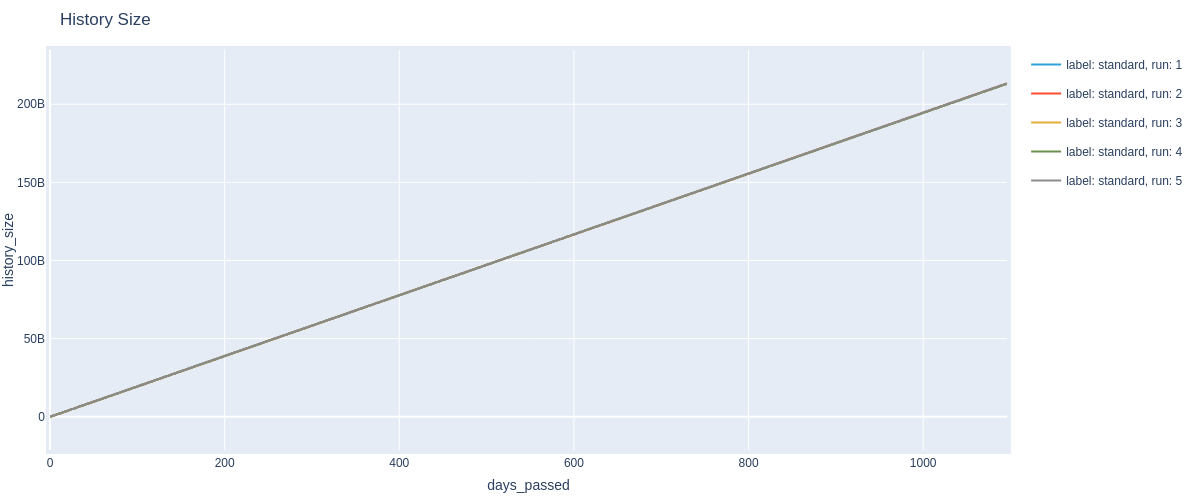

In [17]:
chart = sim_df.hvplot.line(x='days_passed', y='history_size', by=['label', 'run'], title='History Size', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

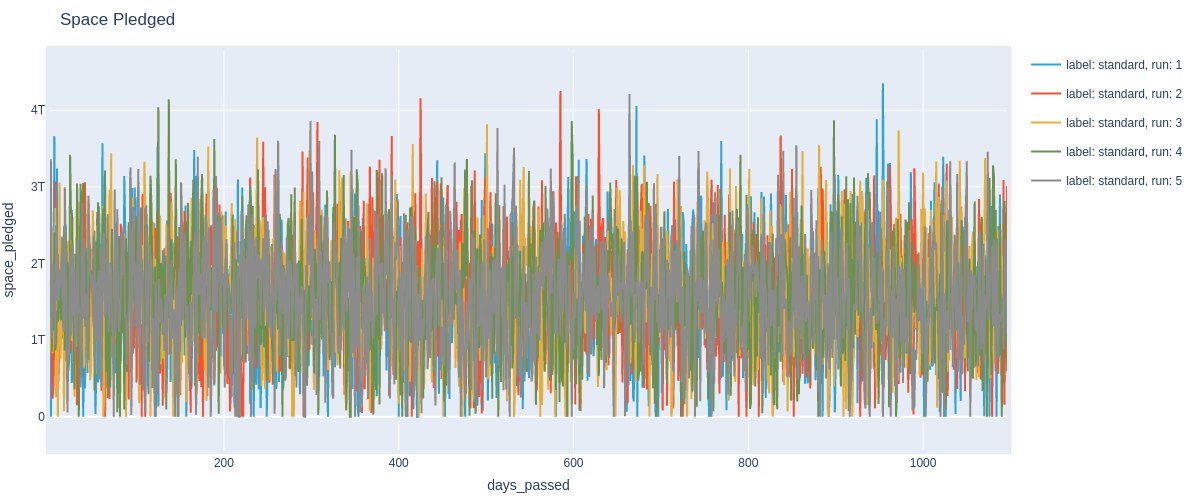

In [18]:
chart = sim_df.set_index(['days_passed', 'label', 'run']).space_pledged.diff().to_frame().query('days_passed > 0').hvplot.line(x='days_passed', y='space_pledged', by=['label', 'run'], title='Space Pledged', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

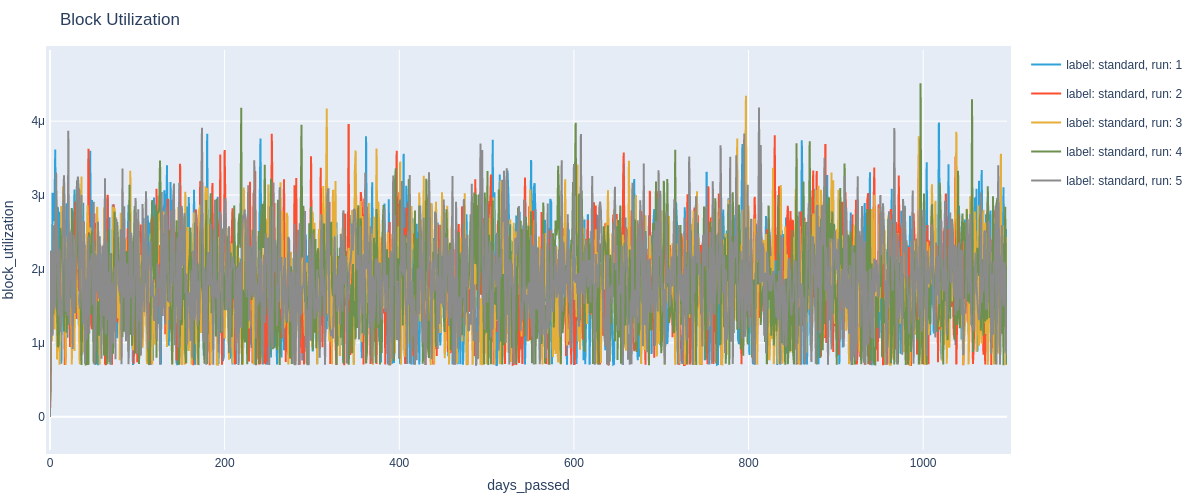

In [19]:
chart = sim_df.hvplot.line(x='days_passed', y='block_utilization', by=['label', 'run'], title='Block Utilization', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))

In [20]:
from subspace_model.experiments.metrics import *


lst = []
for i, g_df in sim_df.set_index(['days_passed', 'label', 'run']).groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()


2024-01-03 21:16:20 - subspace-digital-twin - INFO
------------subspace-digital-twin------------


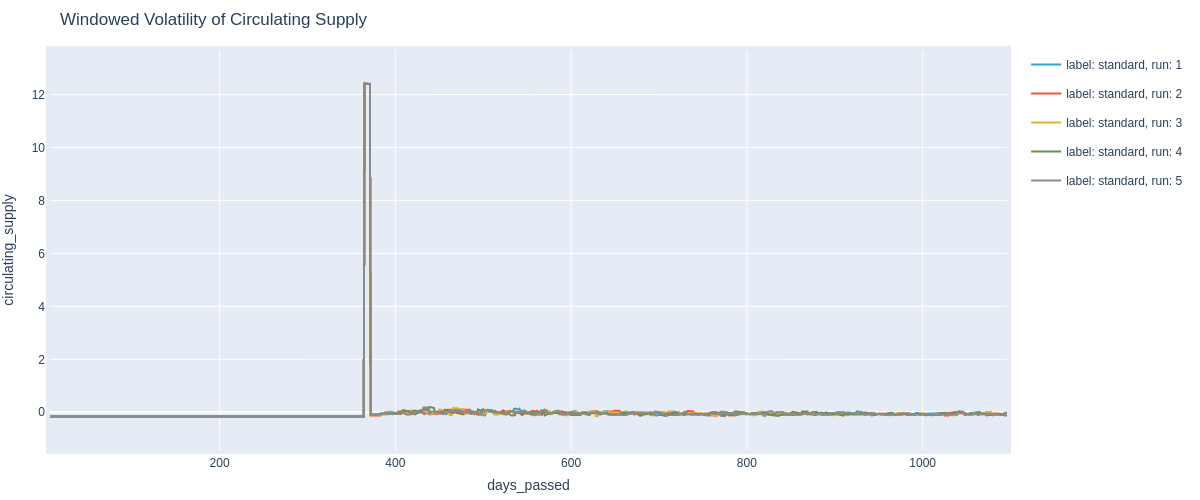

In [21]:
chart = df.hvplot.line(x='days_passed', y='circulating_supply', by=['label', 'run'], title='Windowed Volatility of Circulating Supply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))